## Introduction
---
- We have a dataset containing information about China's GDP (Gross Domestic Product).

- The goal is to predict the China's overall GDP by a non-linear function.

- We're going to use the function below (called the sigmoid function). We need to compute the optimal betas for it.

$$ \hat{Y} = \frac1{1+e^{\beta\_0(x-\beta\_1)}}$$

- The dataset contains:
    - Unnamed: 0 - Year
    - Each Chinese city - The GDP of that city

## Initial libraries and functions
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
def sigmoid(x, beta_0, beta_1):
     y = 1 / (
         1 + np.exp(-beta_0 * (x - beta_1))
     )
     return np.array(y)

In [3]:
def model_evaluation(y_test, y_hat) -> None:
    print('R2 score            = ', r2_score(y_test, y_hat))
    print('Mean absolute error = ', mean_absolute_error(y_test, y_hat))
    print('Mean squared error  = ', mean_squared_error(y_test, y_hat))

## Exploratory Data Analysis (EDA)
---
- Dataset looks clean.
- However, we need to create the 'overall_gdp' column ourselves.

In [4]:
df = pd.read_csv('Chinas_GDP.csv')
df.head()

,Unnamed: 0,Beijing,Tianjin,Hebei,Shanxi,Inner Mongolia,Liaoning,Jilin,Heilongjiang,Shanghai,...,Chongqing,Sichuan,Guizhou,Yunnan,Tibet,Shaanxi,Gansu,Qinghai,Ningxia,Xinjiang
0,2020,36102.6,14083.7,36206.9,17651.9,17359.8,25115.0,12311.3,13698.5,38700.6,...,25002.8,48598.8,17826.6,24521.9,1902.7,26181.9,9016.7,3005.9,3920.6,13797.6
1,2019,35445.1,14055.5,34978.6,16961.6,17212.5,24855.3,11726.8,13544.4,37987.6,...,23605.8,46363.8,16769.3,23223.8,1697.8,25793.2,8718.3,2941.1,3748.5,13597.1
2,2018,33106.0,13362.9,32494.6,15958.1,16140.8,23510.5,11253.8,12846.5,36011.8,...,21588.8,42902.1,15353.2,20880.6,1548.4,23941.9,8104.1,2748.0,3510.2,12809.4
3,2017,29883.0,12450.6,30640.8,14484.3,14898.1,21693.0,10922.0,12313.0,32925.0,...,20066.3,37905.1,13605.4,18486.0,1349.0,21473.5,7336.7,2465.1,3200.3,11159.9
4,2016,27041.2,11477.2,28474.1,11946.4,13789.3,20392.5,10427.0,11895.0,29887.0,...,18023.0,33138.5,11792.4,16369.0,1173.0,19045.8,6907.9,2258.2,2781.4,9630.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      29 non-null     int64  
 1   Beijing         29 non-null     float64
 2   Tianjin         29 non-null     float64
 3   Hebei           29 non-null     float64
 4   Shanxi          29 non-null     float64
 5   Inner Mongolia  29 non-null     float64
 6   Liaoning        29 non-null     float64
 7   Jilin           29 non-null     float64
 8   Heilongjiang    29 non-null     float64
 9   Shanghai        29 non-null     float64
 10  Jiangsu         29 non-null     float64
 11  Zhejiang        29 non-null     float64
 12  Anhui           29 non-null     float64
 13  Fujian          29 non-null     float64
 14  Jiangxi         29 non-null     float64
 15  Shandong        29 non-null     float64
 16  Henan           29 non-null     float64
 17  Hubei           29 non-null     float

### Preprocessing

In [6]:
df.rename(columns={'Unnamed: 0': 'year'},inplace=True)

df.set_index("year", inplace = True)

df['overall'] = np.mean(df, axis=1)

df.head()

,Beijing,Tianjin,Hebei,Shanxi,Inner Mongolia,Liaoning,Jilin,Heilongjiang,Shanghai,Jiangsu,...,Sichuan,Guizhou,Yunnan,Tibet,Shaanxi,Gansu,Qinghai,Ningxia,Xinjiang,overall
year,,,,,,,,,,,,,,,,,,,,,
2020,36102.6,14083.7,36206.9,17651.9,17359.8,25115.0,12311.3,13698.5,38700.6,102719.0,...,48598.8,17826.6,24521.9,1902.7,26181.9,9016.7,3005.9,3920.6,13797.6,32658.554839
2019,35445.1,14055.5,34978.6,16961.6,17212.5,24855.3,11726.8,13544.4,37987.6,98656.8,...,46363.8,16769.3,23223.8,1697.8,25793.2,8718.3,2941.1,3748.5,13597.1,31687.758065
2018,33106.0,13362.9,32494.6,15958.1,16140.8,23510.5,11253.8,12846.5,36011.8,93207.6,...,42902.1,15353.2,20880.6,1548.4,23941.9,8104.1,2748.0,3510.2,12809.4,29487.661290
2017,29883.0,12450.6,30640.8,14484.3,14898.1,21693.0,10922.0,12313.0,32925.0,85869.8,...,37905.1,13605.4,18486.0,1349.0,21473.5,7336.7,2465.1,3200.3,11159.9,26841.819355
2016,27041.2,11477.2,28474.1,11946.4,13789.3,20392.5,10427.0,11895.0,29887.0,77350.9,...,33138.5,11792.4,16369.0,1173.0,19045.8,6907.9,2258.2,2781.4,9630.8,24224.148387


<Axes: xlabel='year', ylabel='GDP rate'>

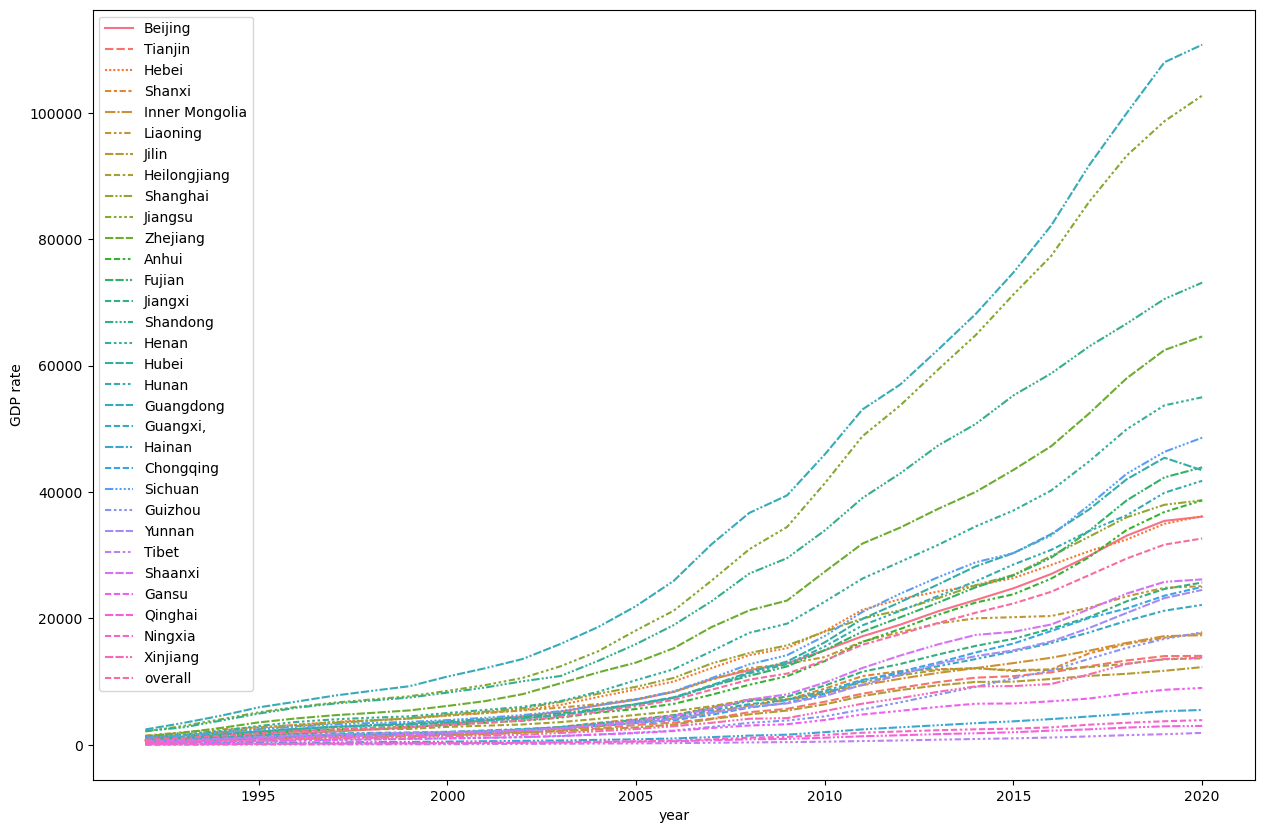

In [7]:
plt.figure(figsize=(15,10))
plt.ylabel('GDP rate')
sns.lineplot(data=df)

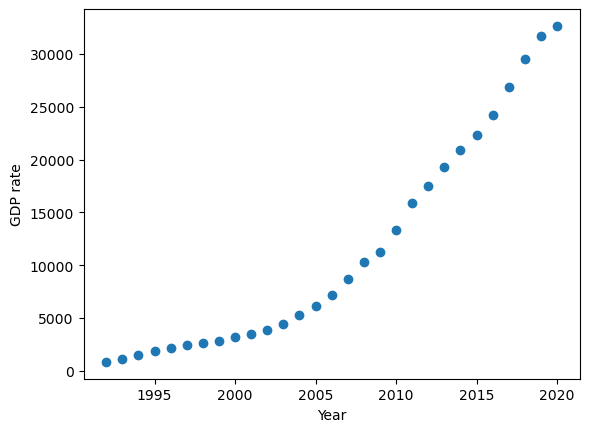

In [8]:
plt.xlabel('Year')
plt.ylabel('GDP rate')

plt.scatter(df.index, df['overall'])

## Non-linear regression
---
- Since we didn't have many records, I didn't split our data into training and testing sets.

### Preprocessing

In [9]:
x, y = df.index, df['overall']

x, y = x / max(x), y / max(y) # Normalizing data. I didn't use any transformer this time to keep things simple.

### Computing the best possible parameters

In [10]:
optimal_betas , *_ = curve_fit(sigmoid, x, y)

print(f'beta_0 = {optimal_betas[0]}, beta_1 = {optimal_betas[1]}')

beta_0 = 491.76435102404145, beta_1 = 0.9955898155867251


### Plotting and evaluating our model
- As expected, since we didn't split our data into training and testing sets, our model is overfitted.
- But for now, it’s enough.

In [11]:
y_hat = sigmoid(x, optimal_betas[0], optimal_betas[1])

model_evaluation(y, y_hat)

R2 score            =  0.9851184505461437
Mean absolute error =  0.029606856279907518
Mean squared error  =  0.001432845615267809


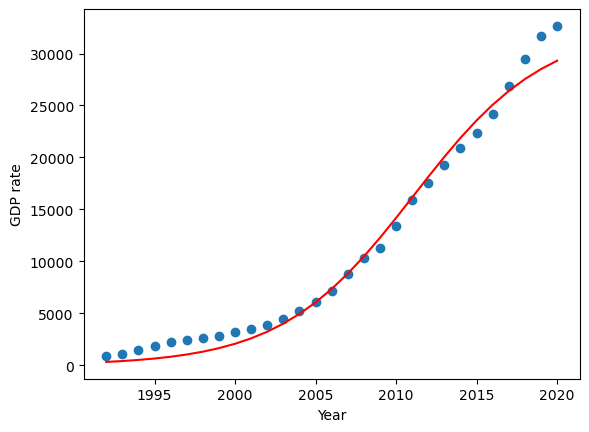

In [12]:
plt.xlabel('Year')
plt.ylabel('GDP rate')

plt.scatter(df.index, df['overall'])

plt.plot(
    df.index,
    y_hat * max(df.overall), # To unnormalize our prediction.
    'r'
)

---
<center>
    <h3>
        <i>
            This concludes the notebook. Feel free to reach out with any questions or suggestions!
        </i>
    </h3>
</center>